In [29]:
import matplotlib.pyplot as plt
from sklearn import linear_model # usando sklear para saber los valores optimos
import seaborn as sns
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv("C:/Users/adm_usu/Downloads/cars.csv", sep=",")

In [31]:
data[['year','priceUSD']].head()

,year,priceUSD
0,2008,5500
1,2009,5350
2,2009,7000
3,2003,3300
4,2008,5200


<Axes: xlabel='year', ylabel='priceUSD'>

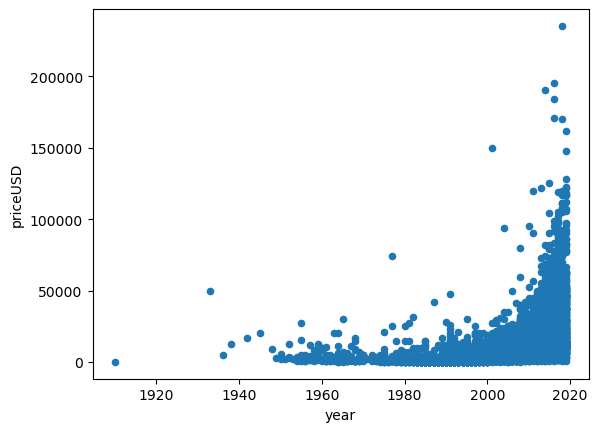

In [115]:
data[['year','priceUSD']].plot.scatter(x='year', y='priceUSD')

In [116]:
# pruebas de parametro 

w = -0.00055169
b = -14.58847

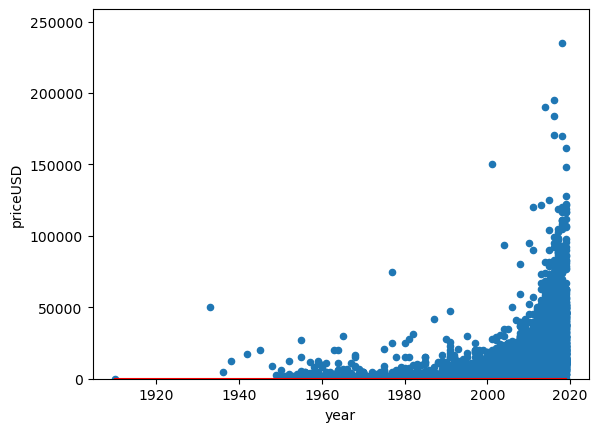

In [117]:
# puntos de la recta
x = np.linspace(1910,data['year'].max(),10)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
data.plot.scatter(x='year',y='priceUSD')
plt.plot(x, y, '-r')
plt.ylim(0,data['priceUSD'].max()*1.1)
# plt.grid()
plt.show()

In [118]:
# calculo de las predicciones
data['sigmoid'] = 1/(1+np.exp(-(data['year']*w+b)))

In [119]:
# calculo de la funcion de error
data['loss_xi'] = -data['priceUSD']*np.log(data['sigmoid'])-(1-data['priceUSD'])*np.log(1-data['sigmoid'])
cost_j = data['loss_xi'].mean()
cost_j

116398.97668086365

In [120]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [121]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [122]:
def sum_error_df(df):
    data['sigmoid'] = 1/(1+np.exp(-(data['year']*df['w']+df['b'])))
    data['loss_xi'] = -data['priceUSD']*np.log(data['sigmoid'])-(1-data['priceUSD'])*np.log(1-data['sigmoid'])
    j_cost = data['loss_xi'].mean()
    return(j_cost)

In [123]:
df['error'] = df.apply(sum_error_df, axis=1)

C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [111]:
df.sort_values(by=['error']).head()

,w,b,error
0,0.05,-4.00,-inf
658,0.11,-3.42,-inf
659,0.11,-3.41,-inf
660,0.11,-3.40,-inf
661,0.11,-3.39,-inf


In [82]:
df_3d = df.pivot(index='w', columns='b', values='error')


In [83]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.06,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.07,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.08,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.09,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1180: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1181: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]


C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


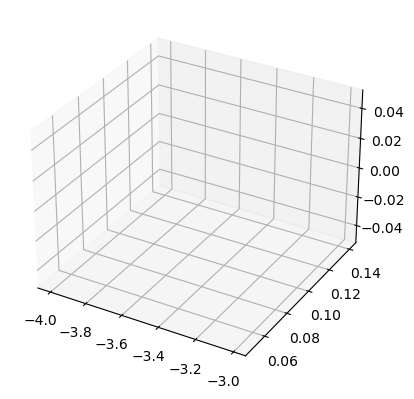

In [85]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


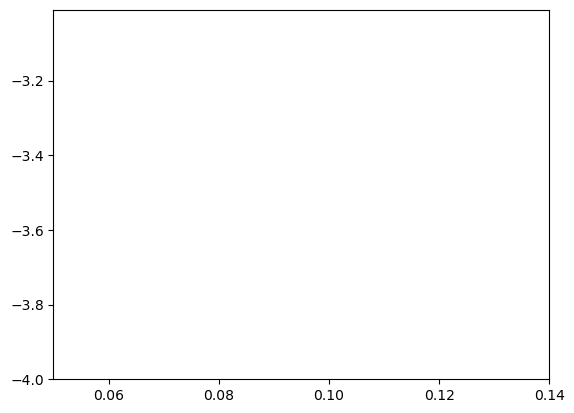

In [86]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)


In [87]:
# Optimizando los parámetros
def delta_j_w(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['year']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['priceUSD'])*data['year']
    derivative = data['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['year']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['priceUSD'])
    derivative = data['partial_loss'].mean()
    return(derivative) 

In [91]:
# Damos valores iniciales a 
w_0 = -0.00055169
w_b = -14.58847

In [92]:
# Empezamos a iterar hasta obtener valores que no varíen tanto
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

14895.51610877156 1479.3212879596044


In [90]:
#  lo mismo pero mucho más rápido con sklear
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_data = np.array(data['year']).reshape((-1, 1))
Y_data = np.array(data['priceUSD'])

# creando modelo
model = LogisticRegression()
model.fit(X_data, Y_data)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): [-2.63573742e-07 -2.76106222e-07  2.29901556e-07 ... -2.78580967e-07
 -2.78872667e-07 -2.79164484e-07]
pendiente (w): [[-0.00057618]
 [-0.0005564 ]
 [ 0.00041335]
 ...
 [-0.00055258]
 [-0.00055213]
 [-0.00055169]]
